## Hotel Booking Demand - Modelling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


" Other libraries "
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.naive_bayes import GaussianNB # Naives Bayes
from sklearn.neural_network import MLPClassifier # Neural Network

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE


from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, auc, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

In [2]:
folder_path = r"C:\Users\yrobi\Desktop\Robin World\Data Science - Machine Learning Prep\Robin - Data Science\1-Hotel Bookings Demand - Kaggle\Hotel-Booking-Demand\data"
hotel_df = pd.read_csv(f'{folder_path}\\hotel_data_cleaned.csv')
display(hotel_df.head())
print(hotel_df.info())

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,meal,...,distribution_channel,previous_cancellations,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,adr,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,342,July,27,1,0 weekend night,0 week night,2 adults,BB,...,Direct,0,C,C,3,No Deposit,0.0,0.0,0,0
1,Resort Hotel,0,737,July,27,1,0 weekend night,0 week night,2 adults,BB,...,Direct,0,C,C,4,No Deposit,0.0,0.0,0,0
2,Resort Hotel,0,7,July,27,1,0 weekend night,1 week night,1 adult,BB,...,Direct,0,A,C,0,No Deposit,0.0,75.0,0,0
3,Resort Hotel,0,13,July,27,1,0 weekend night,1 week night,1 adult,BB,...,Corporate,0,A,A,0,No Deposit,304.0,75.0,0,0
4,Resort Hotel,0,14,July,27,1,0 weekend night,2 week night,2 adults,BB,...,TA/TO,0,A,A,0,No Deposit,240.0,98.0,0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87396 entries, 0 to 87395
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   hotel                        87396 non-null  object 
 1   is_canceled                  87396 non-null  int64  
 2   lead_time                    87396 non-null  int64  
 3   arrival_date_month           87396 non-null  object 
 4   arrival_date_week_number     87396 non-null  int64  
 5   arrival_date_day_of_month    87396 non-null  int64  
 6   stays_in_weekend_nights      87176 non-null  object 
 7   stays_in_week_nights         87056 non-null  object 
 8   adults                       87382 non-null  object 
 9   meal                         87396 non-null  object 
 10  market_segment               87396 non-null  object 
 11  distribution_channel         87396 non-null  object 
 12  previous_cancellations       87396 non-null  int64  
 13  reserved_room_ty

Text(0, 0.5, 'Total Count')

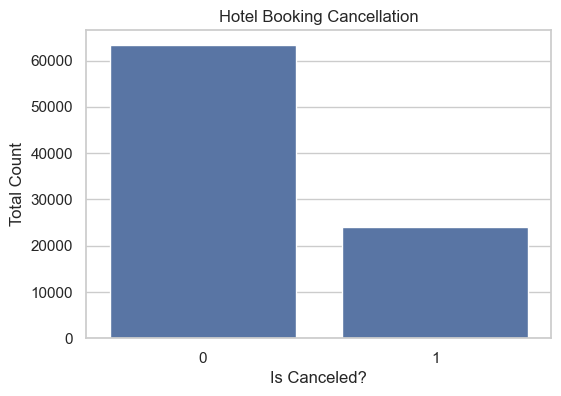

In [3]:
## Create X (features) and y(response)
X_features = hotel_df.drop('is_canceled', axis=1)
# display(X_features.head())
y_target = hotel_df.is_canceled
# display(y_target.head())

## is_cancelled
plt.figure(figsize=(6, 4))
sns.set(style="whitegrid")
ax = sns.countplot(x="is_canceled", data=hotel_df)
plt.title('Hotel Booking Cancellation')
plt.xlabel('Is Canceled?')
plt.ylabel('Total Count')

# checking frequncy of target classes
# y_target.value_counts()


## Baseline Accuracy

In [4]:
""" Baseline Accuracy """

booking_cancel = (hotel_df['is_canceled'] == 1).sum()
print("No. of booking canceled: ", booking_cancel)
not_booking_cancel = (hotel_df['is_canceled'] == 0).sum()
print("No. of booking not canceled: ", not_booking_cancel)
total_booking = booking_cancel + not_booking_cancel
print("Total count: ", total_booking)
print("\n\nBaseline Accuracy based on majority class:")
print("% of booking cancelation: ", (not_booking_cancel/total_booking) * 100, "%" )

No. of booking canceled:  24025
No. of booking not canceled:  63371
Total count:  87396


Baseline Accuracy based on majority class:
% of booking cancelation:  72.5101835324271 %


## Encoding - Scaling Datasets
- Splitting the datasets into train and test datasets
- Lisiting numerical and categorical features
- Encoding and Scaling train and test datasets
- Finally checking the number of columns in both train and test datasets


###  Splitting dataset into Train and Test datasets

In [5]:
# ## Splitiing hotel datasets into training and testing datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size = 0.3, 
                                                    random_state=0, stratify=y_target)

print ("Dimension of Training Dataset: ", X_train.shape)
display(X_train.head())
print ("Dimension of Testing Dataset: ", X_test.shape)
display(X_test.head())

Dimension of Training Dataset:  (61177, 20)


,hotel,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,meal,market_segment,distribution_channel,previous_cancellations,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,adr,required_car_parking_spaces,total_of_special_requests
63857,City Hotel,69,June,25,17,1 weekend night,2 week night,2 adults,BB,Online TA,TA/TO,0,A,A,0,No Deposit,9.0,126.9,0,0
72907,City Hotel,215,November,48,21,1 weekend night,1 week night,1 adult,BB,Groups,Corporate,0,A,E,1,No Deposit,0.0,75.0,0,0
83813,City Hotel,125,June,26,29,0 weekend night,3 week night,2 adults,BB,Direct,Direct,0,A,C,0,No Deposit,14.0,95.7,0,3
77080,City Hotel,19,March,9,1,1 weekend night,4 week night,2 adults,BB,Direct,Direct,0,D,D,0,No Deposit,14.0,133.0,0,2
6475,Resort Hotel,65,October,41,4,0 weekend night,5 week night,1 adult,BB,Online TA,TA/TO,0,A,A,0,No Deposit,240.0,70.0,0,0


Dimension of Testing Dataset:  (26219, 20)


,hotel,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,meal,market_segment,distribution_channel,previous_cancellations,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,adr,required_car_parking_spaces,total_of_special_requests
40488,City Hotel,157,May,22,23,1 weekend night,2 week night,2 adults,BB,Online TA,TA/TO,0,D,D,0,No Deposit,9.0,114.30,0,2
76866,City Hotel,12,March,11,12,2 weekend night,3 week night,1 adult,BB,Online TA,TA/TO,0,D,D,0,No Deposit,8.0,99.45,0,0
55047,City Hotel,7,October,44,27,0 weekend night,1 week night,2 adults,BB,Corporate,Corporate,0,A,A,0,No Deposit,0.0,114.00,0,0
58258,City Hotel,1,February,9,25,0 weekend night,3 week night,2 adults,BB,Online TA,TA/TO,0,F,B,1,No Deposit,9.0,100.00,0,0
62104,City Hotel,81,May,21,15,2 weekend night,0 week night,2 adults,BB,Groups,TA/TO,0,A,A,0,No Deposit,133.0,90.00,0,1


### List of numerical and categorical features

In [6]:
""" List of numerical and categorical columns """
def num_cat(df):
    
    num_int_type = df.select_dtypes(include='int64').columns.tolist()
    num_float_type = df.select_dtypes(include='float64').columns.tolist()
    num_type = num_int_type + num_float_type

    cat_object_type = df.select_dtypes(include='object').columns.tolist()
    
    return num_type, cat_object_type

num_type_tn, cat_obj_type_tn = num_cat(X_train)
print("Features of Train Dataset:\n")
print(num_type_tn, cat_obj_type_tn)
num_type_tt, cat_obj_type_tt = num_cat(X_test)
print("\n\nFeatures of Test Dataset:\n")
print(num_type_tt, cat_obj_type_tt)

Features of Train Dataset:

['lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month', 'previous_cancellations', 'booking_changes', 'required_car_parking_spaces', 'total_of_special_requests', 'agent', 'adr'] ['hotel', 'arrival_date_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type']


Features of Test Dataset:

['lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month', 'previous_cancellations', 'booking_changes', 'required_car_parking_spaces', 'total_of_special_requests', 'agent', 'adr'] ['hotel', 'arrival_date_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type']


In [7]:
""" 
    - Preprocessing datasets for modeling
    - Scaling and encoding  
"""
## Encoding categoirical variables to numeric type - understandable to machine learning model
## scaling numerical variables with mean "0" and standard devaition "1"

from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer

""" 
    - Preprocessing datasets for modeling
    - Imputing, Scaling and encoding  
"""
def num_cat_transformer(num_type, cat_object_type):
    # Preprocessing for numerical features:
    num_transformer = make_pipeline(SimpleImputer(strategy='median'),
                                    RobustScaler())

    # Preprocessing for categorical features:
    cat_transformer = make_pipeline(SimpleImputer(strategy='most_frequent'),
                                    OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))

    ## Transforming both numerical and catergorical columns based preprocessing above
    column_transformer = make_column_transformer((num_transformer, num_type),
                                                 (cat_transformer, cat_object_type),
                                                 remainder="passthrough")
    return column_transformer

column_transformer_tn = num_cat_transformer(num_type_tn, cat_obj_type_tn)
X_train = pd.DataFrame(column_transformer_tn.fit_transform(X_train))
print("Encoded and Scaled of the Train dataset ")
display(X_train.head())

X_test = pd.DataFrame(column_transformer_tn.transform(X_test))
print("Encoded and Scaled of the Test dataset ")
display(X_test.head())


Encoded and Scaled of the Train dataset 


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.175439,-0.095238,0.066667,0.0,0.0,0.0,0.0,0.000000,0.465806,0.0,6.0,1.0,3.0,2.0,0.0,6.0,3.0,0.0,0.0,0.0
1,1.456140,1.000000,0.333333,0.0,1.0,0.0,0.0,-0.038961,-0.371290,0.0,9.0,1.0,1.0,1.0,0.0,4.0,0.0,0.0,4.0,0.0
2,0.666667,-0.047619,0.866667,0.0,0.0,0.0,3.0,0.021645,-0.037419,0.0,6.0,0.0,4.0,2.0,0.0,3.0,1.0,0.0,2.0,0.0
3,-0.263158,-0.857143,-1.000000,0.0,0.0,0.0,2.0,0.021645,0.564194,0.0,7.0,1.0,5.0,2.0,0.0,3.0,1.0,3.0,3.0,0.0
4,0.140351,0.666667,-0.800000,0.0,0.0,0.0,0.0,1.000000,-0.451935,1.0,10.0,0.0,6.0,1.0,0.0,6.0,3.0,0.0,0.0,0.0


Encoded and Scaled of the Test dataset 


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.947368,-0.238095,0.466667,0.0,0.0,0.0,2.0,0.000000,0.262581,0.0,8.0,1.0,3.0,2.0,0.0,6.0,3.0,3.0,3.0,0.0
1,-0.324561,-0.761905,-0.266667,0.0,0.0,0.0,0.0,-0.004329,0.023065,0.0,7.0,2.0,4.0,1.0,0.0,6.0,3.0,3.0,3.0,0.0
2,-0.368421,0.809524,0.733333,0.0,0.0,0.0,0.0,-0.038961,0.257742,0.0,10.0,0.0,1.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0
3,-0.421053,-0.857143,0.600000,0.0,1.0,0.0,0.0,0.000000,0.031935,0.0,3.0,0.0,4.0,2.0,0.0,6.0,3.0,5.0,1.0,0.0
4,0.280702,-0.285714,-0.066667,0.0,0.0,0.0,1.0,0.536797,-0.129355,0.0,8.0,2.0,0.0,2.0,0.0,4.0,3.0,0.0,0.0,0.0


### Model Evaluation

In [8]:
"""  Imbalance dataset - upsampling """

from collections import Counter

def upsampling_data(X, y):
    # Upsampling the training set
    # Upsample using SMOTE
    sm = SMOTE(sampling_strategy='auto', random_state=42)
    X_sm, y_sm = sm.fit_resample(X_train, y_train)
    
    print("Before SMOTE: ", Counter(y_train))
    print("After SMOTE: ", Counter(y_sm))
    return X_sm, y_sm


""" Training Model """
def train_model(model, X, y, num_procs, metrics):
    
    # split1 = KFold(n_splits=5, shuffle=False, random_state=None)
    split2 = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
    
    # get cross validation score for each model:
    cv_score = cross_val_score(model, X, y,
                               cv=split2,
                               scoring=metrics,
                               n_jobs=-1).mean()
    return cv_score


""" Model Prediction """
def model_predict(model, X_trainn, y_trainn, X_topredict, y_true):    
    model.fit(X_trainn, y_trainn)
    y_pred = model.predict(X_topredict)
    
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred) 
    
    return precision, recall, f1, cm


In [9]:
"""
    Evaluating Models
    - Decision Trees
    - Logistic Regression
    - Naive Bayes
    - Neural Network

"""

# intialize the model list and dicts
models = []
mean_score = {}
std_dev = {}
# res = {}

# define number of processes to run in parallel
num_procs = -1

# create models  
DT_model = DecisionTreeClassifier(random_state=42)
Logreg_model = LogisticRegression(random_state=42, n_jobs=-1)
GNM_model = GaussianNB()
MLP_model = MLPClassifier(hidden_layer_sizes=(13,13,13), max_iter=500)

# list all models
models.extend([DT_model, Logreg_model, GNM_model, MLP_model])

# parallel cross-validate models, using mean precision as evaluation metric, and print summaries
print("===================== Beginning cross validation ========================== ")

test_report = {}
for model in models:
    print("\nModel: \n", model)
    # Calling train_model()
    X_train_sm, y_train_sm = upsampling_data(X_train, y_train)
    cv_score = train_model(model, X_train_sm, y_train_sm, num_procs,'precision')
    print("\n Precision obtained from CV on Train Data:", round(cv_score, 4))
    precision_test, recall_test, f1_test, cm = model_predict(model, X_train, y_train, X_test, y_test)
    print(f"===== Metrics report on Test data =====")
    print(f"Precision: {precision_test}")
    print(f"Recall: {recall_test}")
    print(f"F1 score: {f1_test}")
    print(f"Confusion Matrix:\n {cm}")

    print("==================================================================================\n")


===================== Beginning cross validation ========================== 

Model: 
 DecisionTreeClassifier(random_state=42)
Before SMOTE:  Counter({0: 44360, 1: 16817})
After SMOTE:  Counter({0: 44360, 1: 44360})

 Precision obtained from CV on Train Data: 0.807
===== Metrics report on Test data =====
Precision: 0.7525787734580194
Recall: 0.7500667454899119
F1 score: 0.7512636024818928
Confusion Matrix:
 [[15620  3391]
 [ 3162  4046]]


Model: 
 LogisticRegression(n_jobs=-1, random_state=42)
Before SMOTE:  Counter({0: 44360, 1: 16817})
After SMOTE:  Counter({0: 44360, 1: 44360})

 Precision obtained from CV on Train Data: 0.6901
===== Metrics report on Test data =====
Precision: 0.7510282026909757
Recall: 0.7679926770662496
F1 score: 0.7365019213023227
Confusion Matrix:
 [[17890  1121]
 [ 4962  2246]]


Model: 
 GaussianNB()
Before SMOTE:  Counter({0: 44360, 1: 16817})
After SMOTE:  Counter({0: 44360, 1: 44360})

 Precision obtained from CV on Train Data: 0.5443
===== Metrics report

## Hyperparameters tuning for the best model

- MLP Classifier
- Logistic Regression


In [10]:

mlp = MLPClassifier(hidden_layer_sizes=(13,13,13), max_iter=500)

In [11]:
mlp.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (13, 13, 13),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 500,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

## Using a grid search

In [12]:
from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import RandomizedSearchCV
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [13]:

params = {}
params['hidden_layer_sizes'] = [(13,13,13), (10,10,9)]
params['activation'] = ['tanh', 'relu']
params['alpha'] = [0.0001, 0.05, 0.005]
# params['learning_rate'] = ['constant', 'adaptive']
params

{'hidden_layer_sizes': [(13, 13, 13), (10, 10, 9)],
 'activation': ['tanh', 'relu'],
 'alpha': [0.0001, 0.05, 0.005]}

In [14]:
grid_clf = GridSearchCV(mlp, params, cv=10, scoring='precision')
grid_clf.fit(X_train, y_train)

grid_clf.best_params_

{'activation': 'tanh', 'alpha': 0.005, 'hidden_layer_sizes': (13, 13, 13)}

In [15]:
grid_clf.best_score_

np.float64(0.7145560412079595)

In [16]:
y_pred = grid_clf.predict(X_test)
# y_pred

In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87     19011
           1       0.73      0.46      0.56      7208

    accuracy                           0.80     26219
   macro avg       0.77      0.70      0.72     26219
weighted avg       0.79      0.80      0.79     26219



In [18]:
logreg = LogisticRegression(solver='liblinear', random_state=42)

In [19]:
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [20]:
params = {}
params['penalty'] = ['l1', 'l2']
params['C'] = [0.1, 1, 10]
params

{'penalty': ['l1', 'l2'], 'C': [0.1, 1, 10]}

In [21]:
grid_logreg = GridSearchCV(logreg, params, cv=5, scoring='precision')
grid_logreg.fit(X_train, y_train);

In [22]:
grid_logreg.best_params_

{'C': 10, 'penalty': 'l1'}

In [23]:
grid_logreg.best_score_

np.float64(0.6765010241870943)

In [24]:
y_pred_logreg = grid_logreg.predict(X_test)
# y_pred_logreg

In [25]:
print(classification_report(y_test, y_pred_logreg))

              precision    recall  f1-score   support

           0       0.78      0.94      0.86     19011
           1       0.67      0.31      0.43      7208

    accuracy                           0.77     26219
   macro avg       0.73      0.63      0.64     26219
weighted avg       0.75      0.77      0.74     26219

